In [2]:
import pandas as pd
import os
df=pd.DataFrame()
root=str()

In [3]:
for path, dirs, files in os.walk('F:\Lessons\Lesson4\data'):
    for file in files:
        root = path + '\\' +file
        df_start=pd.read_csv(root, sep=',')
        l=root.split('\\')
        df_start=df_start.assign(name= l[-2], data = l[-3]) 
        df=pd.concat([df, df_start]).reset_index(drop=True)
df=df.drop('Unnamed: 0', 1)
df


,product_id,quantity,name,data
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [3]:
df.quantity.sum()

480

In [11]:
df.groupby('name').agg({'quantity':'sum'}).sort_values('quantity', ascending=False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


In [20]:
df=df.groupby('product_id').agg({'quantity':'sum'}).reset_index()
df

,product_id,quantity
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10
...,...,...
66,94,13
67,95,3
68,96,5
69,97,3


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


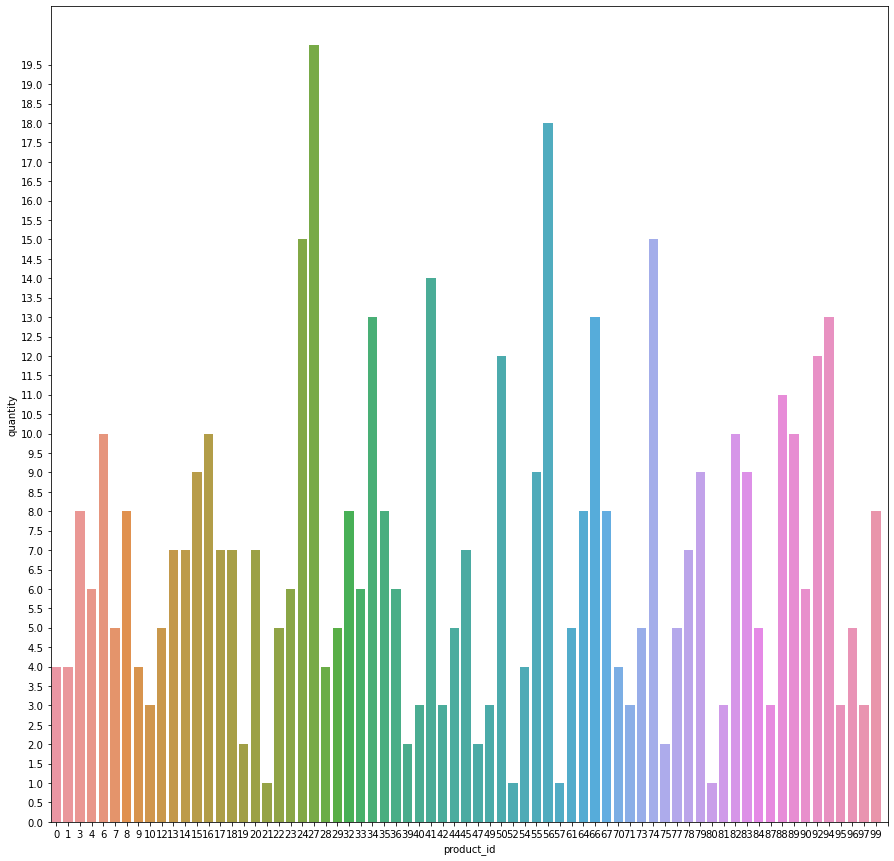

In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15)) #масштабирую
x=df.product_id 
y=df.quantity 
graf=sns.barplot(x, y, data=df)
graf.set_xticks(np.arange(0, len(x)+1, 1))
graf.set_yticks(np.arange(0, max(y), 0.5))
plt.show()



In [14]:
df1=df.groupby('data', as_index=False).agg({'quantity':'sum'})
df1

,data,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


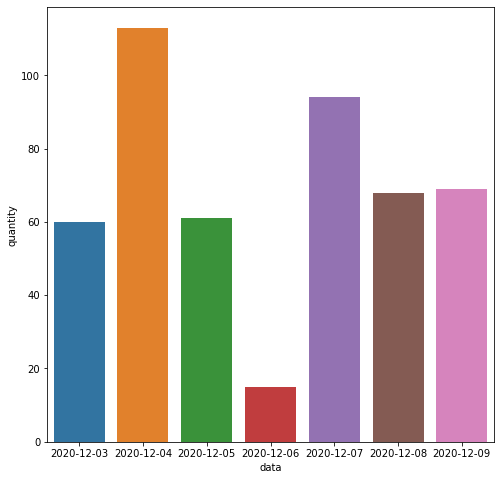

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8)) #масштабирую
x=df1.data
y=df1.quantity 
graf=sns.barplot(x, y, data=df1)
plt.show()